In [290]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [291]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')
df_solution = pd.read_csv('../data/solution_format.csv')

In [292]:
df_train.head()

,obs,job_title,job_posted_date,salary_category,job_state,feature_1,feature_2,feature_3,feature_4,feature_5,...,job_desc_291,job_desc_292,job_desc_293,job_desc_294,job_desc_295,job_desc_296,job_desc_297,job_desc_298,job_desc_299,job_desc_300
0,1,Others,2024/07,High,NY,A,0.6429,False,False,True,...,-0.362079,-0.499308,-0.367894,-0.214881,0.014870,-0.271177,-0.113347,-0.587955,-0.919095,-0.207340
1,2,Job_Title_1,2024/07,Low,CA,A,0.4678,False,False,False,...,-0.300989,-0.415411,-0.341824,-0.319064,0.042322,-0.124755,0.023489,-0.893224,-0.823024,0.112364
2,3,Others,2024/07,Low,CA,A,0.4610,False,False,False,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4,Others,2024/07,Low,CA,A,0.5064,False,False,False,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,5,Others,2024/07,Low,CA,A,0.4640,False,False,False,...,-0.406159,-0.654657,-0.074398,-0.464479,0.081037,-0.136992,-0.276270,-0.696853,-0.601466,0.089939


In [293]:
df_test.head()

,obs,job_title,job_posted_date,job_state,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,job_desc_291,job_desc_292,job_desc_293,job_desc_294,job_desc_295,job_desc_296,job_desc_297,job_desc_298,job_desc_299,job_desc_300
0,1281,Others,2024/06,CA,A,0.6473,False,False,True,True,...,-0.054078,-0.573635,-0.306883,-0.325092,0.089463,-0.353476,-0.159314,-0.667958,-0.702116,-0.206267
1,1282,Others,2024/08,NY,A,0.4238,True,False,False,False,...,-0.868718,-0.337967,-0.179036,-0.717763,0.404843,0.032468,-0.190448,-1.261702,-0.505897,0.082080
2,1283,Others,2023/01,CA,A,0.6219,True,False,False,True,...,-0.416109,-0.619822,-0.493653,-0.347556,0.071679,-0.331212,-0.381348,-0.506540,-0.773561,-0.105221
3,1284,Job_Title_5,2024/06,NY,A,0.6704,False,False,False,True,...,-0.297560,-0.481448,-0.497642,-0.254823,0.047404,-0.362739,-0.102704,-0.491272,-0.808156,-0.048326
4,1285,Others,2024/05,CA,A,0.7310,False,False,False,True,...,-0.176458,-0.726473,-0.323976,-0.145825,-0.046866,-0.229873,-0.568318,-0.614605,-0.770506,0.142140


In [294]:
df_train = df_train.convert_dtypes()
df_test = df_test.convert_dtypes()

In [295]:
# handle missing values with simple imputation
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Columns: 317 entries, obs to job_desc_300
dtypes: Float64(301), Int64(2), boolean(9), string(5)
memory usage: 3.4 MB


In [296]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Columns: 316 entries, obs to job_desc_300
dtypes: Float64(301), Int64(2), boolean(9), string(4)
memory usage: 2.3 MB


In [297]:
len(df_train.columns), len(df_test.columns)

(317, 316)

In [298]:
df_train.isnull().sum().sum()

np.int64(474)

In [299]:
df_test.isnull().sum().sum()

np.int64(327)

In [300]:
# detect columns with missing values
df_train_missing_cols= df_train.columns[df_train.isnull().any()].tolist()
df_test_missing_cols = df_test.columns[df_test.isnull().any()].tolist()

In [301]:
df_train_missing_cols

['job_posted_date', 'job_state', 'feature_10']

In [302]:
df_test_missing_cols

['job_state', 'feature_10']

In [303]:
# convert job_posted_date to datetime
df_train['job_posted_date'] = pd.to_datetime(df_train['job_posted_date'], errors='coerce')
df_test['job_posted_date'] = pd.to_datetime(df_test['job_posted_date'], errors='coerce')

C:\Users\Home\AppData\Local\Temp\ipykernel_10596\482167589.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train['job_posted_date'] = pd.to_datetime(df_train['job_posted_date'], errors='coerce')
C:\Users\Home\AppData\Local\Temp\ipykernel_10596\482167589.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test['job_posted_date'] = pd.to_datetime(df_test['job_posted_date'], errors='coerce')


In [304]:
# convert to linux time df_train['job_posted_date']
df_train['job_posted_date'] = df_train['job_posted_date'].astype(np.int64) // 10**9
df_test['job_posted_date'] = df_test['job_posted_date'].astype(np.int64) // 10**9

In [305]:
df_train['job_posted_date']

0       1719792000
1       1719792000
2       1719792000
3       1719792000
4       1719792000
           ...    
1275    1717200000
1276    1719792000
1277    1722470400
1278    1719792000
1279    1719792000
Name: job_posted_date, Length: 1280, dtype: int64

In [306]:
mean = df_train['job_posted_date'].mean()
# fill missing values with mean for df_train['job_posted_date']
df_train['job_posted_date'].fillna(mean, inplace=True)
# fill missing values with mean for df_test['job_posted_date']
df_test['job_posted_date'].fillna(mean, inplace=True)

C:\Users\Home\AppData\Local\Temp\ipykernel_10596\3257847707.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['job_posted_date'].fillna(mean, inplace=True)


In [307]:
mode = df_train['job_state'].mode()[0]
# fill missing values with mode for job_state
df_train['job_state'].fillna(mode, inplace=True)
# fill missing values with mode for job_state
df_test['job_state'].fillna(mode, inplace=True)

C:\Users\Home\AppData\Local\Temp\ipykernel_10596\609640390.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['job_state'].fillna(mode, inplace=True)
C:\Users\Home\AppData\Local\Temp\ipykernel_10596\609640390.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [308]:
df_train['job_state']

0       NY
1       CA
2       CA
3       CA
4       CA
        ..
1275    CA
1276    CA
1277    NY
1278    CA
1279    NY
Name: job_state, Length: 1280, dtype: string

In [309]:
df_test['job_state']

0      CA
1      NY
2      CA
3      NY
4      CA
       ..
849    CA
850    CA
851    IL
852    DC
853    CA
Name: job_state, Length: 854, dtype: string

In [310]:
df_train['feature_10']

0         60
1         60
2         36
3         72
4         48
        ... 
1275    <NA>
1276    <NA>
1277    <NA>
1278    <NA>
1279      36
Name: feature_10, Length: 1280, dtype: Int64

In [311]:
mean = int(df_train['feature_10'].mean())
# fill missing values with mean for feature_10
df_train['feature_10'].fillna(mean, inplace=True)
# fill missing values with mean for feature_10
df_test['feature_10'].fillna(mean, inplace=True)

C:\Users\Home\AppData\Local\Temp\ipykernel_10596\881114896.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['feature_10'].fillna(mean, inplace=True)


In [312]:
df_train.isnull().sum().sum()

np.int64(0)

In [313]:
df_test.isnull().sum().sum()

np.int64(0)

In [314]:
df_train.duplicated().sum()


np.int64(0)

In [315]:
df_test.duplicated().sum()

np.int64(0)

In [316]:
df_train_string = df_train.select_dtypes(include=['string']).drop(columns=['salary_category'])
df_test_string = df_test.select_dtypes(include=['string'])
# identify all unique values in df_train_string and df_test_string
unique_train_values = {col: df_train_string[col].unique() for col in df_train_string.columns}
unique_test_values = {col: df_test_string[col].unique() for col in df_test_string.columns}

In [317]:
unique_train_values

{'job_title': <StringArray>
 [      'Others',  'Job_Title_1',  'Job_Title_2',  'Job_Title_3',
   'Job_Title_4',  'Job_Title_5',  'Job_Title_6',  'Job_Title_7',
   'Job_Title_8',  'Job_Title_9', 'Job_Title_10', 'Job_Title_11',
  'Job_Title_12', 'Job_Title_13', 'Job_Title_14', 'Job_Title_15',
  'Job_Title_16', 'Job_Title_17', 'Job_Title_18', 'Job_Title_19',
  'Job_Title_20', 'Job_Title_21', 'Job_Title_22', 'Job_Title_23',
  'Job_Title_24', 'Job_Title_25', 'Job_Title_26', 'Job_Title_27']
 Length: 28, dtype: string,
 'job_state': <StringArray>
 ['NY', 'CA', 'WA', 'NC', 'KY', 'DC', 'NJ', 'TX', 'FL', 'MA', 'VA', 'AZ', 'GA',
  'IL', 'IN', 'MD', 'TN', 'CO', 'CT', 'SD', 'MI', 'MN', 'PA', 'AK', 'UT', 'OH',
  'SC', 'AR', 'OR', 'OK', 'LA', 'NM', 'NV', 'IA', 'MO', 'AL']
 Length: 36, dtype: string,
 'feature_1': <StringArray>
 ['A', 'B', 'C', 'E', 'D']
 Length: 5, dtype: string}

In [318]:
unique_test_values

{'job_title': <StringArray>
 [      'Others',  'Job_Title_5', 'Job_Title_10', 'Job_Title_13',
  'Job_Title_27',  'Job_Title_7',  'Job_Title_8',  'Job_Title_2',
   'Job_Title_3',  'Job_Title_9',  'Job_Title_1', 'Job_Title_19',
  'Job_Title_23',  'Job_Title_6', 'Job_Title_15', 'Job_Title_22',
  'Job_Title_24', 'Job_Title_12', 'Job_Title_11', 'Job_Title_21',
  'Job_Title_17', 'Job_Title_14', 'Job_Title_25', 'Job_Title_20',
  'Job_Title_18', 'Job_Title_16',  'Job_Title_4', 'Job_Title_26']
 Length: 28, dtype: string,
 'job_state': <StringArray>
 ['CA', 'NY', 'VA', 'WA', 'MA', 'UT', 'IN', 'IL', 'TX', 'PA', 'IA', 'KY', 'OH',
  'CO', 'NJ', 'DC', 'AL', 'CT', 'MD', 'OR', 'GA', 'NV', 'MO', 'AZ', 'NC', 'MN',
  'MI', 'WY', 'AR', 'TN', 'SC', 'KS', 'RI', 'FL']
 Length: 34, dtype: string,
 'feature_1': <StringArray>
 ['A', 'B', 'C', 'D', 'E']
 Length: 5, dtype: string}

In [319]:
# merge unique values in unique_test_values and unique_train_values
unique_values = {col: np.union1d(unique_train_values[col], unique_test_values[col]) for col in unique_train_values.keys()}

In [320]:
unique_values

{'job_title': array(['Job_Title_1', 'Job_Title_10', 'Job_Title_11', 'Job_Title_12',
        'Job_Title_13', 'Job_Title_14', 'Job_Title_15', 'Job_Title_16',
        'Job_Title_17', 'Job_Title_18', 'Job_Title_19', 'Job_Title_2',
        'Job_Title_20', 'Job_Title_21', 'Job_Title_22', 'Job_Title_23',
        'Job_Title_24', 'Job_Title_25', 'Job_Title_26', 'Job_Title_27',
        'Job_Title_3', 'Job_Title_4', 'Job_Title_5', 'Job_Title_6',
        'Job_Title_7', 'Job_Title_8', 'Job_Title_9', 'Others'],
       dtype=object),
 'job_state': array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'FL', 'GA', 'IA',
        'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'MI', 'MN', 'MO', 'NC',
        'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD',
        'TN', 'TX', 'UT', 'VA', 'WA', 'WY'], dtype=object),
 'feature_1': array(['A', 'B', 'C', 'D', 'E'], dtype=object)}

In [321]:
# use unique_values for one hot encoding df_train_string and df_test_string
def one_hot_encode(df, unique_values):
    for col in df.columns:
        for value in unique_values[col]:
            df[f'{col}_{value}'] = (df[col] == value).astype(int)
    return df.drop(columns=df.columns[df.isnull().any()])

df_train_encoded = one_hot_encode(df_train_string, unique_values)
df_test_encoded = one_hot_encode(df_test_string, unique_values)

In [322]:
df_train_encoded.drop(columns=['job_title','job_state','feature_1'], inplace=True)

In [323]:
df_test_encoded.drop(columns=['job_title','job_state','feature_1'], inplace=True)

In [324]:
df_train_encoded

,job_title_Job_Title_1,job_title_Job_Title_10,job_title_Job_Title_11,job_title_Job_Title_12,job_title_Job_Title_13,job_title_Job_Title_14,job_title_Job_Title_15,job_title_Job_Title_16,job_title_Job_Title_17,job_title_Job_Title_18,...,job_state_TX,job_state_UT,job_state_VA,job_state_WA,job_state_WY,feature_1_A,feature_1_B,feature_1_C,feature_1_D,feature_1_E
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1277,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [325]:
df_test_encoded

,job_title_Job_Title_1,job_title_Job_Title_10,job_title_Job_Title_11,job_title_Job_Title_12,job_title_Job_Title_13,job_title_Job_Title_14,job_title_Job_Title_15,job_title_Job_Title_16,job_title_Job_Title_17,job_title_Job_Title_18,...,job_state_TX,job_state_UT,job_state_VA,job_state_WA,job_state_WY,feature_1_A,feature_1_B,feature_1_C,feature_1_D,feature_1_E
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
850,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
851,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [326]:
df_num = df_train.select_dtypes(include=['int64', 'float64'])
df_bool = df_train.select_dtypes(include=['bool'])
df_string = df_train.select_dtypes(include=['string'])
#drop column salary_category from df_string
df_string = df_string.drop(columns=['salary_category'])
df_string.head()

,job_title,job_state,feature_1
0,Others,NY,A
1,Job_Title_1,CA,A
2,Others,CA,A
3,Others,CA,A
4,Others,CA,A


In [327]:
# convert catoregical columns to one-hot encoding
df_cat = pd.get_dummies(df_string, drop_first=True)

In [328]:
y = pd.get_dummies(df_train['salary_category'])
y = y.astype(int)
y

,High,Low,Medium
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1275,1,0,0
1276,1,0,0
1277,0,0,1
1278,0,0,1


In [329]:
#concatenate numerical, categorical and boolean columns
df_train = pd.concat([df_num, df_bool, df_train_encoded, y], axis=1)

In [330]:
df_num = df_test.select_dtypes(include=['int64', 'float64'])
df_bool = df_test.select_dtypes(include=['bool'])

In [331]:
#concatenate numerical, categorical and boolean columns
df_test = pd.concat([df_num, df_bool, df_test_encoded], axis=1)

In [332]:
X = df_train.drop(columns=['High', 'Low', 'Medium'])
y = df_train[['High', 'Low', 'Medium']]

In [333]:
# split train valid
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      test_size=0.2,
                                                      random_state=42)

In [334]:
# normlaize numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_valid[num_cols] = scaler.transform(X_valid[num_cols])
X_test = df_test.copy()
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [335]:
X_train = X_train.astype(np.float32)
X_valid = X_valid.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_valid = y_valid.astype(np.float32)

In [336]:
X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape

((1024, 385), (256, 385), (854, 385), (1024, 3), (256, 3))

In [337]:
# handle outliers
def handle_outliers(df, threshold=3):
    for col in df.select_dtypes(include=['float32', 'float64']).columns:
        mean = df[col].mean()
        std = df[col].std()
        upper_limit = mean + threshold * std
        lower_limit = mean - threshold * std
        df[col] = np.clip(df[col], lower_limit, upper_limit)
    return df
X_train = handle_outliers(X_train)
X_valid = handle_outliers(X_valid)
X_test = handle_outliers(X_test)

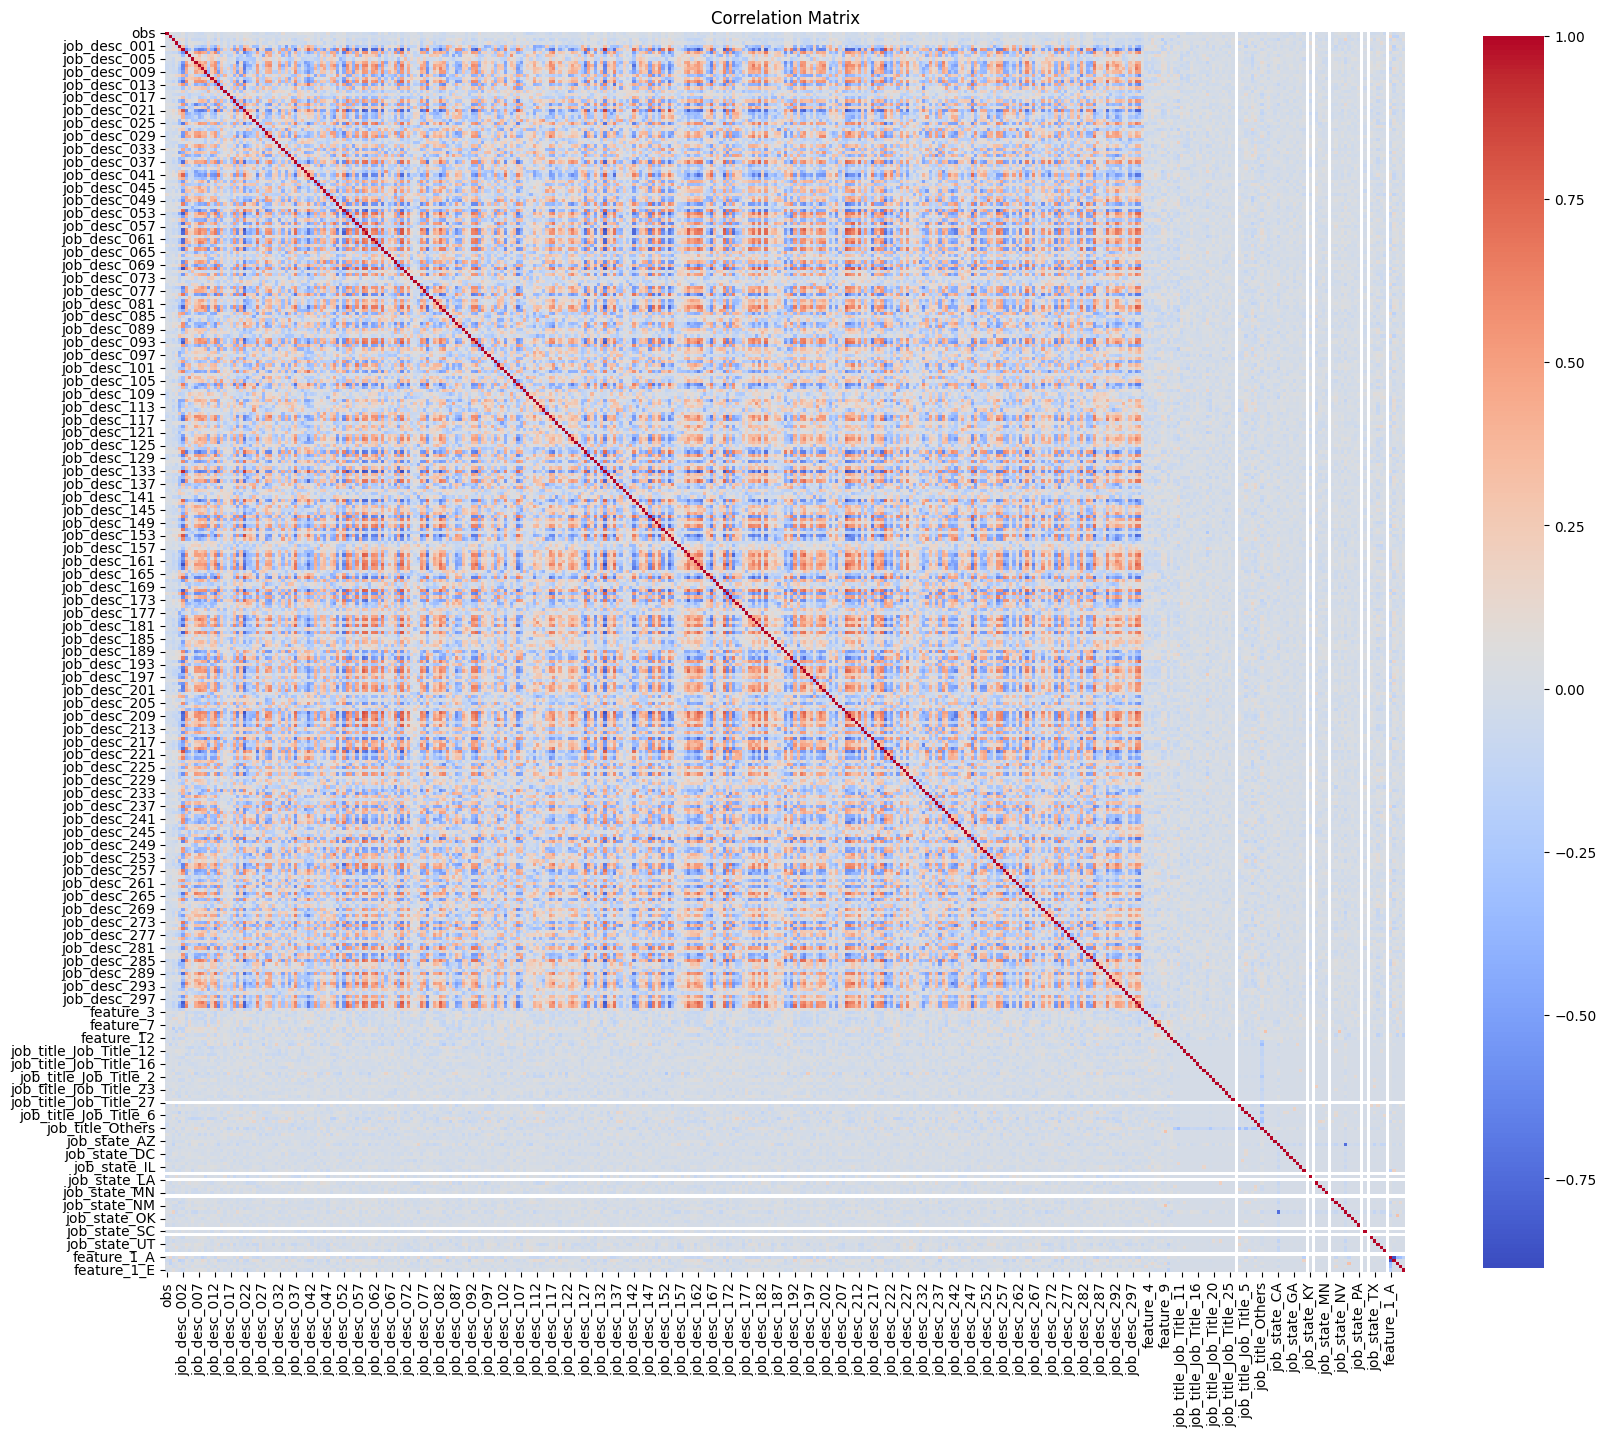

In [338]:
# create a correlation matrix
corr_matrix = X_train.corr()
# plot the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [339]:
# select columns with high correlation
corr_matrix_full = X_train.corr()
high_corr_cols = set()
for col in corr_matrix_full.columns:
    for idx in range(len(corr_matrix_full[col])):
        if abs(corr_matrix_full[col][idx]) > 0.8 and corr_matrix_full.index[idx] != col:
            high_corr_cols.add(corr_matrix_full.index[idx])
high_corr_cols = list(high_corr_cols)
print("Columns with high correlation:", high_corr_cols)
# drop columns with high correlation
X_train.drop(columns=high_corr_cols, inplace=True)
X_valid.drop(columns=high_corr_cols, inplace=True)
X_test.drop(columns=high_corr_cols, inplace=True)


C:\Users\Home\AppData\Local\Temp\ipykernel_10596\3214687376.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(corr_matrix_full[col][idx]) > 0.8 and corr_matrix_full.index[idx] != col:


Columns with high correlation: ['job_desc_153', 'job_desc_208', 'job_desc_166', 'job_desc_078', 'job_desc_053', 'job_desc_002', 'feature_1_A', 'job_desc_170', 'job_desc_059', 'job_desc_299', 'job_desc_070', 'job_desc_181', 'job_desc_021', 'job_desc_159', 'job_desc_162', 'job_desc_220', 'job_desc_058', 'job_desc_210', 'job_desc_052', 'job_desc_082', 'feature_1_B', 'job_desc_298', 'job_desc_183', 'job_desc_133', 'job_desc_195', 'job_desc_093']


In [340]:
# Balance the dataset using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
# Before SMOTE, convert y_train from one-hot to single label
y_train_single = y_train.idxmax(axis=1)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train_single)

# Convert y_train_balanced back to one-hot encoding
y_train_balanced = pd.get_dummies(y_train_balanced)

print("Shape of balanced X_train:", X_train_balanced.shape)
print("Shape of balanced y_train:", y_train_balanced.shape)

Shape of balanced X_train: (1221, 359)
Shape of balanced y_train: (1221, 3)


In [341]:
X_train = X_train_balanced
y_train = y_train_balanced

In [342]:
# train neural network with pytorch with early stopping with train and valid split 
import torch
import torch.nn as nn
import torch.optim as optim

# Define a complex neural network model with dropout and batch normalization
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.dropout3 = nn.Dropout(0.5)
        self.fc4 = nn.Linear(128, 3)  # Output layer for 3 classes

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = torch.relu(self.bn3(self.fc3(x)))
        x = self.dropout3(x)
        x = self.fc4(x)  # No activation here, will apply sigmoid in loss function
        return x
def train_model(model, X_train, y_train, X_valid, y_valid, num_epochs=10000, batch_size=8, patience=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.00003)
    
    X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)
    X_valid_tensor = torch.tensor(X_valid.values, dtype=torch.float32).to(device)
    y_valid_tensor = torch.tensor(y_valid.values, dtype=torch.float32).to(device)

    best_val_loss = float('inf')
    epochs_no_improve = 0

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            val_outputs = model(X_valid_tensor)
            val_loss = criterion(val_outputs, y_valid_tensor)

        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
            best_model_state = model.state_dict()
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print("Early stopping triggered")
            break

    model.load_state_dict(best_model_state)
    return model
# Initialize and train the model
input_dim = X_train.shape[1]
model = SimpleNN(input_dim)
trained_model = train_model(model, X_train, y_train, X_valid, y_valid, num_epochs=10000, batch_size=32, patience=50)
# Evaluate the model for test set
def evaluate_model(model, X_test):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    model.eval()
    with torch.no_grad():
        X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
        outputs = model(X_test_tensor)
        probabilities = torch.sigmoid(outputs).cpu().numpy()
    
    return probabilities


Epoch 1/10000, Loss: 0.7356, Val Loss: 0.6852
Epoch 2/10000, Loss: 0.7330, Val Loss: 0.6848
Epoch 3/10000, Loss: 0.7339, Val Loss: 0.6847
Epoch 4/10000, Loss: 0.7297, Val Loss: 0.6848
Epoch 5/10000, Loss: 0.7333, Val Loss: 0.6850
Epoch 6/10000, Loss: 0.7294, Val Loss: 0.6853
Epoch 7/10000, Loss: 0.7293, Val Loss: 0.6854
Epoch 8/10000, Loss: 0.7223, Val Loss: 0.6856
Epoch 9/10000, Loss: 0.7246, Val Loss: 0.6856
Epoch 10/10000, Loss: 0.7253, Val Loss: 0.6854
Epoch 11/10000, Loss: 0.7225, Val Loss: 0.6851
Epoch 12/10000, Loss: 0.7217, Val Loss: 0.6848
Epoch 13/10000, Loss: 0.7137, Val Loss: 0.6842
Epoch 14/10000, Loss: 0.7158, Val Loss: 0.6837
Epoch 15/10000, Loss: 0.7130, Val Loss: 0.6831
Epoch 16/10000, Loss: 0.7093, Val Loss: 0.6824
Epoch 17/10000, Loss: 0.7125, Val Loss: 0.6817
Epoch 18/10000, Loss: 0.7122, Val Loss: 0.6809
Epoch 19/10000, Loss: 0.7143, Val Loss: 0.6802
Epoch 20/10000, Loss: 0.7152, Val Loss: 0.6793
Epoch 21/10000, Loss: 0.7112, Val Loss: 0.6783
Epoch 22/10000, Loss: 

In [343]:
# evalute the mode on thest set
test_probabilities = evaluate_model(trained_model, X_test)

In [344]:
test_probabilities_df = pd.DataFrame(test_probabilities, columns=['High', 'Low', 'Medium'])
# change to one column with text High, Low, Medium and start with index obs 1281
test_probabilities_df = test_probabilities_df.idxmax(axis=1).reset_index(drop=True)
# add column obs starting with 1281 and salary_category
test_probabilities_df = pd.DataFrame({
    'obs': range(1281, 1281 + len(test_probabilities_df)),
    'salary_category': test_probabilities_df
})

In [345]:
# replace column obs with index starting from 1281
test_probabilities_df['obs'] = test_probabilities_df.index + 1281

In [346]:
# drop index column and set obs as index
test_probabilities_df.set_index('obs', inplace=True)

In [347]:
test_probabilities_df

,salary_category
obs,
1281,High
1282,Medium
1283,High
1284,Low
1285,High
...,...
2130,Low
2131,Medium
2132,Medium


In [348]:
# save solution to csv
test_probabilities_df.to_csv('../code/solution.csv', index=True, header=True)